In [268]:
import pandas as pd


# In[83]:
df = pd.read_csv('Data_Train.csv')
df.head(10)
print(df.shape)


(78458, 11)


In [269]:

#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
df.to_csv('Data_Train_Transformed_1.csv')
df = df[df['Views'] > df["Likes"]]
# print(df.shape)
# print(df.head())

In [270]:
df.isnull().sum()

Unique_ID     0
Name          0
Genre         0
Country       0
Song_Name     1
Timestamp     0
Views         0
Comments      0
Likes         0
Popularity    0
Followers     0
dtype: int64

In [271]:
# Distribution of features by Genre
df_mean = df.groupby('Genre').mean()
#df_mean

In [272]:
#Correlation matrix
df.drop(['Unique_ID','Country','Timestamp','Song_Name','Comments','Followers'],inplace = True, axis = 1)
df.head()


,Name,Genre,Views,Likes,Popularity
0,Hardstyle,danceedm,14017,499.0,97.0
1,Dj Aladdin,danceedm,1918,49.0,17.0
2,Maxximize On Air,danceedm,9668,312.0,91.0
3,GR6 EXPLODE,rbsoul,113036,2400.0,76.0
4,Tritonal,danceedm,110024,3031.0,699.0


In [273]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Converting Genre and Name to labelencoding
labelencoder = LabelEncoder()
oneHotEncoder = OneHotEncoder()
#df['Genre'] = labelencoder.fit_transform(df['Genre'])
# df['Name'] = labelencoder.fit_transform(df['Name'])
df.head()


,Name,Genre,Views,Likes,Popularity
0,Hardstyle,danceedm,14017,499.0,97.0
1,Dj Aladdin,danceedm,1918,49.0,17.0
2,Maxximize On Air,danceedm,9668,312.0,91.0
3,GR6 EXPLODE,rbsoul,113036,2400.0,76.0
4,Tritonal,danceedm,110024,3031.0,699.0


In [274]:
#Hash the Name
from sklearn.feature_extraction import FeatureHasher
nfh = FeatureHasher(n_features=10, input_type='string')
name_hashed_features = nfh.fit_transform(df['Name'])
name_hashed_features = name_hashed_features.toarray()
name_hashed_features = pd.DataFrame(name_hashed_features)
name_hashed_features.head()
print(name_hashed_features.shape)

from sklearn.feature_extraction import FeatureHasher
gfh = FeatureHasher(n_features=10, input_type='string')
genre_hashed_features = gfh.fit_transform(df['Genre'])
genre_hashed_features = genre_hashed_features.toarray()
genre_hashed_features = pd.DataFrame(genre_hashed_features,columns=['gen1','gen2','gen3','gen4','gen5','gen6','gen7','gen8','gen9','gen10',])
genre_hashed_features.head()

print(genre_hashed_features.shape)

(77170, 10)
(77170, 10)


In [275]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
sc_x = StandardScaler()
ct = ColumnTransformer([
         ('somename', StandardScaler(), ['Likes', 'Popularity'])
       ], remainder='passthrough')
df = ct.fit_transform(df)
df = pd.DataFrame(df,columns=['Likes','Popularity','Name','Genre','Views'])
print(df.shape)

(77170, 5)


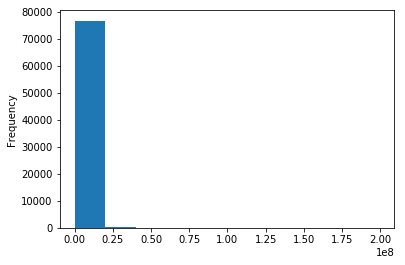

In [276]:
y = df['Views']
df.drop(['Views','Name','Genre'], inplace=True,axis=1)
y.plot.hist()

In [277]:
df = df.join(name_hashed_features)
df = df.join(genre_hashed_features)
print(df.shape)
df['Likes'] = df['Likes'].apply(pd.to_numeric, errors='coerce')
df['Popularity'] = df['Popularity'].apply(pd.to_numeric, errors='coerce')

(77170, 22)


In [278]:
from sklearn.model_selection import train_test_split
#print(df_scaled)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=205)

In [279]:
#XGB Boost regression
import xgboost as xgb
import numpy as np
from sklearn import metrics
xlf = xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
# calculate the auc score
y_pred = xlf.predict(X_test)
#RMSE - Test
print("XGBoost - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


D:\Applns\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.35707e+06
[1]	validation_0-rmse:3.03555e+06
[2]	validation_0-rmse:2.75289e+06
[3]	validation_0-rmse:2.50845e+06
[4]	validation_0-rmse:2.27444e+06
[5]	validation_0-rmse:2.0732e+06
[6]	validation_0-rmse:1.89272e+06
[7]	validation_0-rmse:1.72244e+06
[8]	validation_0-rmse:1.58427e+06
[9]	validation_0-rmse:1.45174e+06
[10]	validation_0-rmse:1.33829e+06
[11]	validation_0-rmse:1.23556e+06
[12]	validation_0-rmse:1.14212e+06
[13]	validation_0-rmse:1.05676e+06
[14]	validation_0-rmse:991997
[15]	validation_0-rmse:928651
[16]	validation_0-rmse:878090
[17]	validation_0-rmse:832700
[18]	validation_0-rmse:793539
[19]	validation_0-rmse:755431
[20]	validation_0-rmse:726681
[21]	validation_0-rmse:698631
[22]	validation_0-rmse:677659
[23]	validation_0-rmse:660176
[24]	validation_0-rmse:644797
[25]	validation_0-rmse:629083
[26]	validation_0-rmse:615338
[27]	validation

In [287]:
import pandas as pd
# In[83]:
test_df = pd.read_csv('D:\Hackathon\MachineHack - Music\Data_Test.csv')
test_df.head(10)
print(test_df.shape)

(19615, 10)


In [288]:
#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

test_df.Likes = test_df.Likes.apply(value_to_float)
test_df.Popularity = test_df.Popularity.apply(value_to_float)

In [289]:
#Correlation matrix
test_df.drop(['Unique_ID','Country','Timestamp','Song_Name','Comments','Followers'],inplace = True, axis = 1)
test_df.head()

,Name,Genre,Likes,Popularity
0,L2Share♫79,all-music,5428.0,118.0
1,Morgan Page,danceedm,738.0,195.0
2,Dirty Workz,danceedm,386.0,96.0
3,Gucci Mane,all-music,388.0,19.0
4,Angga Kecap,rock,79.0,1.0


In [290]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Converting Genre and Name to labelencoding
labelencoder = LabelEncoder()
# test_df['Genre'] = labelencoder.fit_transform(test_df['Genre'])
#test_df['Name'] = labelencoder.fit_transform(test_df['Name'])
test_df.head()

#Hash the Name
name_hashed_features = nfh.transform(test_df['Name'])
name_hashed_features = name_hashed_features.toarray()
name_hashed_features = pd.DataFrame(name_hashed_features)
name_hashed_features.head()
print(name_hashed_features.shape)


genre_hashed_features = gfh.transform(test_df['Genre'])
genre_hashed_features = genre_hashed_features.toarray()
genre_hashed_features = pd.DataFrame(genre_hashed_features,columns=['gen1','gen2','gen3','gen4','gen5','gen6','gen7','gen8','gen9','gen10',])
genre_hashed_features.head()

(19615, 10)


,gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,gen10
0,1.0,-1.0,3.0,0.0,0.0,0.0,1.0,-1.0,0.0,-2.0
1,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,0.0,4.0
2,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,0.0,4.0
3,1.0,-1.0,3.0,0.0,0.0,0.0,1.0,-1.0,0.0,-2.0
4,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,-1.0,0.0,0.0


In [291]:
test_df.drop(['Name','Genre'],inplace = True, axis = 1)
#Standard scaling
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# sc_x = StandardScaler()
# ct = ColumnTransformer([
#          ('somename', StandardScaler(), ['Likes', 'Popularity'])
#        ], remainder='passthrough')
test_df = ct.transform(test_df)
test_df = pd.DataFrame(test_df,columns=['Likes','Popularity'])
print(test_df.head())

      Likes  Popularity
0 -0.068006   -0.166740
1 -0.158250   -0.151475
2 -0.165023   -0.171102
3 -0.164984   -0.186368
4 -0.170930   -0.189936


In [292]:
test_df = test_df.join(name_hashed_features)
test_df = test_df.join(genre_hashed_features)
# test_df['Genre'] = test_df['Genre'].apply(pd.to_numeric, errors='coerce')
test_df['Likes'] = test_df['Likes'].apply(pd.to_numeric, errors='coerce')
test_df['Popularity'] =test_df['Popularity'].apply(pd.to_numeric, errors='coerce')
print(test_df.shape)

(19615, 22)


In [294]:
# calculate the auc score
y_pred_1 = xlf.predict(test_df)
y_pred_1 = pd.DataFrame(y_pred_1)
y_pred_1.to_csv('Data_Test_Predicted_Feature_Hash_Genre_Feature_Hash_Name_XGBoost_V_L_P.csv',sep='#')